In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as math

from ROOT import TCanvas, TGraphErrors, TF1, TH1F, TH2F, gStyle, TGraph
from ROOT import gROOT
from array import array

Welcome to JupyROOT 6.16/00


In [2]:
x = [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340]
y = [29, 28, 28, 44, 48, 58, 63, 72, 81, 64, 64, 64, 42, 56, 38, 30, 23]

y_rev = [23, 30, 38, 56, 42, 64, 64, 64, 81, 72, 63, 58, 48, 44, 28, 28, 29]

x_new = [20, 40, 60, 80, 100, 120, 140, 160, 180]

print y[:9] 
print y_rev[:9]

y_new = [sum(x) for x in zip(y[:9], y_rev[:9])]
print y_new



[29, 28, 28, 44, 48, 58, 63, 72, 81]
[23, 30, 38, 56, 42, 64, 64, 64, 81]
[52, 58, 66, 100, 90, 122, 127, 136, 162]


In [3]:
x = [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340]
y = [29, 28, 28, 44, 48, 58, 63, 72, 81, 64, 64, 64, 42, 56, 38, 30, 23]

data = []
for i in range(0, len(x)):
    for j in range(0, y[i]):
        data.append(x[i])


Info in <TCanvas::Print>: eps file figure1.eps has been created


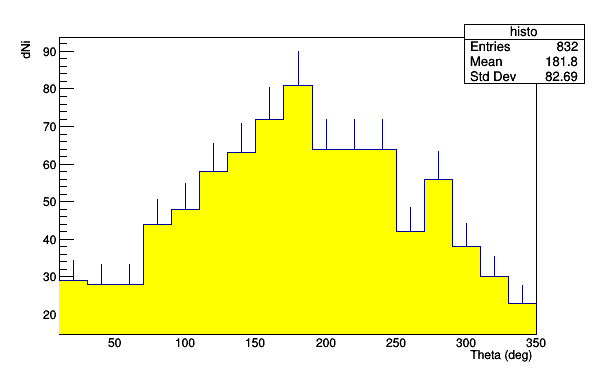

In [4]:
#Create a canvas to draw your histograms and functions
c1 = TCanvas( 'c1', 'title', 200, 10, 600, 400 ) 

histo = TH1F("histo", " ", 17, 10, 350) 

#Label the X-Y axis
histo.GetYaxis().SetTitle(" dNi ")
histo.GetXaxis ().SetTitle (" Theta (deg) ");

for datapoint in data:
    histo.Fill(datapoint)
    
#Draw your histogram with error bars and draw it on the canvas
histo.SetFillColor(5)

histo.Draw("E")
histo.Draw("same")

c1.Draw()
c1.SaveAs('figure1.eps')

In [5]:
data = []
for i in range(0, len(x_new)):
    for j in range(0, y_new[i]):
        data.append(x_new[i])

Warning in <TROOT::Append>: Replacing existing TH1: histo (Potential memory leak).
Info in <TCanvas::Print>: eps file figure2.eps has been created


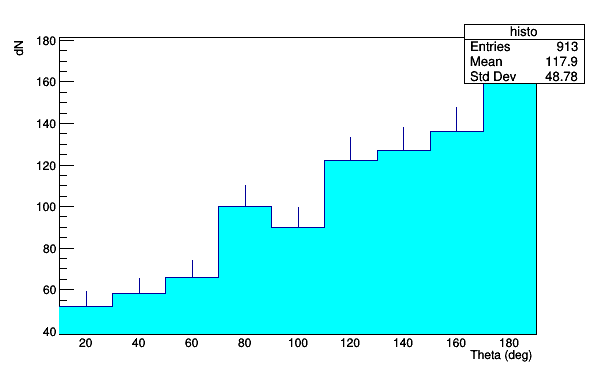

In [6]:
#Create a canvas to draw your histograms and functions
c2 = TCanvas( 'c2', 'title', 200, 10, 600, 400 ) 

histo = TH1F("histo", " ", 9, 10, 190) 

#Label the X-Y axis
histo.GetYaxis().SetTitle(" dN ")
histo.GetXaxis ().SetTitle (" Theta (deg) ");

#for i in range(0, len(x_new)):
#    histo.Fill(x_new[i], y_new[i])

for datapoint in data:
    histo.Fill(datapoint)

#Draw your histogram with error bars and draw it on the canvas
histo.SetFillColor(7)

histo.Draw("E")
histo.Draw("same")

c2.Draw()

c2.SaveAs('figure2.eps')

In [7]:
x_new_2 = [10, 20, 30, 40, 50, 60, 70, 80, 90]
y_new = [52, 58, 66, 100, 90, 122, 127, 136, 162]

x_rad = [i*(math.pi/180) for i in x_new_2]

x_final = [math.sin(i) for i in x_rad]
y_final = y_new

print x_final

[0.17364817766693033, 0.3420201433256687, 0.49999999999999994, 0.6427876096865393, 0.766044443118978, 0.8660254037844386, 0.9396926207859083, 0.984807753012208, 1.0]



****************************************
Minimizer is Linear
Chi2                      =       13.266
NDf                       =            7
p0                        =      22.7639   +/-   7.00346     
p1                        =      111.803   +/-   10.7489     


Info in <TCanvas::Print>: eps file figure3.eps has been created


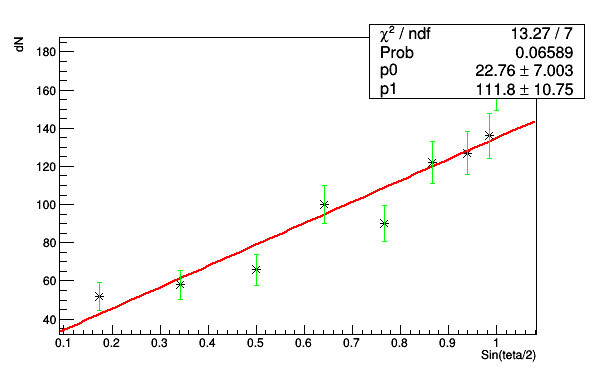

In [8]:
sx =  array( 'f', [0 for i in x_final])
sy =  array( 'f', [ math.sqrt(i) for i in y_final])

c3 = TCanvas( 'c3', '', 200, 10, 600, 400 )
gr = TGraph(len(x_final), array('f',x_final), array('f',y_final))
gr = TGraphErrors(len(x_final), array('f',x_final), array('f',y_final), sx, sy)
gr.SetLineColor( 3 )
gr.SetLineWidth( 1 )
gr.SetTitle( ' ' )
gr.GetXaxis().SetTitle( 'Sin(teta/2)')
gr.GetYaxis().SetTitle( 'dN' )
gr.Draw('A*')

l1 = TF1('l1', 'pol1')
gr.Fit(l1,'','')
gStyle.SetOptFit(1111)

c3.Draw()

c3.SaveAs('figure3.eps')